## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [1]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Variables for camera calibration using chessboard images

CHESSBOARD_SHAPE = (9,6)
CHESSBOARD_IMAGES = glob.glob("./camera_cal/*.jpg")

In [4]:
# Drawing and saving the chessboard images with corners detected

objp = np.zeros((CHESSBOARD_SHAPE[0]*CHESSBOARD_SHAPE[1],3), np.float32)
objp[:,:2] = np.mgrid[0:CHESSBOARD_SHAPE[0], 0:CHESSBOARD_SHAPE[1]].T.reshape(-1,2)

obj_points = []
img_points = []

corner_not_found_images = []
for image in CHESSBOARD_IMAGES:
    img = cv2.imread(image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, CHESSBOARD_SHAPE, None)
    if ret:
        obj_points.append(objp)
        img_points.append(corners.reshape((CHESSBOARD_SHAPE[0]*CHESSBOARD_SHAPE[1],2)))
        
        cv2.drawChessboardCorners(img, CHESSBOARD_SHAPE, corners, ret)
        imageName = image.split("\\")[-1]
        print("Writing Image: ./output_images/chessboardCorners/"+imageName)
        cv2.imwrite("./output_images/chessboardCorners/"+imageName, img)
    else:
        print("Unable to find corners for " + image)
        corner_not_found_images.append(image)

Unable to find corners for ./camera_cal\calibration1.jpg
Writing Image: ./output_images/chessboardCorners/calibration10.jpg
Writing Image: ./output_images/chessboardCorners/calibration11.jpg
Writing Image: ./output_images/chessboardCorners/calibration12.jpg
Writing Image: ./output_images/chessboardCorners/calibration13.jpg
Writing Image: ./output_images/chessboardCorners/calibration14.jpg
Writing Image: ./output_images/chessboardCorners/calibration15.jpg
Writing Image: ./output_images/chessboardCorners/calibration16.jpg
Writing Image: ./output_images/chessboardCorners/calibration17.jpg
Writing Image: ./output_images/chessboardCorners/calibration18.jpg
Writing Image: ./output_images/chessboardCorners/calibration19.jpg
Writing Image: ./output_images/chessboardCorners/calibration2.jpg
Writing Image: ./output_images/chessboardCorners/calibration20.jpg
Writing Image: ./output_images/chessboardCorners/calibration3.jpg
Unable to find corners for ./camera_cal\calibration4.jpg
Unable to find co

In [50]:
#Image 1 got with : CHESSBOARD_SHAPE = (9,5)
#Image 4 got with : CHESSBOARD_SHAPE = (6,5)
#Image 5 got with : CHESSBOARD_SHAPE = (7,6)

CHESSBOARD_SHAPE = (7,6)
image = "./camera_cal\calibration5.jpg"
img = cv2.imread(image)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray, CHESSBOARD_SHAPE, None)
if ret:
    cv2.drawChessboardCorners(img, CHESSBOARD_SHAPE, corners, ret)
    imageName = image.split("\\")[-1]
    print("Writing Image: ./output_images/chessboardCorners/"+imageName)
    cv2.imwrite("./output_images/chessboardCorners/"+imageName, img)
else:
    print("Unable to find corners for " + image)
    

Writing Image: ./chessboardCorners/calibration5.jpg


In [3]:
# Calibrating the camera based on the picked object and image points

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, gray.shape[::-1], None, None)

NameError: name 'obj_points' is not defined

In [ ]:
# Showing an undistorted image

img = cv2.imread('./camera_cal/calibration4.jpg')
dst = cv2.undistort(img, mtx, dist, None, mtx)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

In [8]:
# Saving all images with undistortion 
for image in CHESSBOARD_IMAGES:
    img = cv2.imread(image)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    imageName = image.split("\\")[-1]
    print("Writing Image: ./output_images/undistortedImages/"+imageName)
    cv2.imwrite("./output_images/undistortedImages/"+imageName, dst)

Writing Image: ./output_images/undistortedImages/calibration1.jpg
Writing Image: ./output_images/undistortedImages/calibration10.jpg
Writing Image: ./output_images/undistortedImages/calibration11.jpg
Writing Image: ./output_images/undistortedImages/calibration12.jpg
Writing Image: ./output_images/undistortedImages/calibration13.jpg
Writing Image: ./output_images/undistortedImages/calibration14.jpg
Writing Image: ./output_images/undistortedImages/calibration15.jpg
Writing Image: ./output_images/undistortedImages/calibration16.jpg
Writing Image: ./output_images/undistortedImages/calibration17.jpg
Writing Image: ./output_images/undistortedImages/calibration18.jpg
Writing Image: ./output_images/undistortedImages/calibration19.jpg
Writing Image: ./output_images/undistortedImages/calibration2.jpg
Writing Image: ./output_images/undistortedImages/calibration20.jpg
Writing Image: ./output_images/undistortedImages/calibration3.jpg
Writing Image: ./output_images/undistortedImages/calibration4.jpg

In [63]:
# Checking for Perpective transform
CHESSBOARD_SHAPE = (9,6)
images = glob.glob("./output_images/undistortedImages/*.jpg")
for image in images:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    ret, corners = cv2.findChessboardCorners(gray, CHESSBOARD_SHAPE)
    if ret:
        offset = 100
        img_size = (img.shape[1], img.shape[0])
        src = np.float32([corners[0], corners[CHESSBOARD_SHAPE[0]-1], corners[-1], corners[-CHESSBOARD_SHAPE[0]]])
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
        M = cv2.getPerspectiveTransform(src, dst)
        warped = cv2.warpPerspective(img, M, img_size)
        imageName = image.split("\\")[-1]
        print("Writing Image: ./output_images/perspectiveTranformedImages/"+imageName)
        cv2.imwrite("./output_images/perspectiveTranformedImages/"+imageName, warped)

Writing Image: ./output_images/perspectiveTranformedImages/calibration1.jpg
Writing Image: ./output_images/perspectiveTranformedImages/calibration10.jpg
Writing Image: ./output_images/perspectiveTranformedImages/calibration11.jpg
Writing Image: ./output_images/perspectiveTranformedImages/calibration12.jpg
Writing Image: ./output_images/perspectiveTranformedImages/calibration13.jpg
Writing Image: ./output_images/perspectiveTranformedImages/calibration14.jpg
Writing Image: ./output_images/perspectiveTranformedImages/calibration15.jpg
Writing Image: ./output_images/perspectiveTranformedImages/calibration16.jpg
Writing Image: ./output_images/perspectiveTranformedImages/calibration17.jpg
Writing Image: ./output_images/perspectiveTranformedImages/calibration18.jpg
Writing Image: ./output_images/perspectiveTranformedImages/calibration19.jpg
Writing Image: ./output_images/perspectiveTranformedImages/calibration2.jpg
Writing Image: ./output_images/perspectiveTranformedImages/calibration20.jpg
W

## Second, I'll apply distortion correction to raw images

In [9]:
testImages = glob.glob("./test_images/*.jpg")
for image in testImages:
    img = cv2.imread(image)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    imageName = image.split("\\")[-1]
    print("Writing Image: ./output_images/undistortedTestImages/"+imageName)
    cv2.imwrite("./output_images/undistortedTestImages/"+imageName, dst)

Writing Image: ./output_images/undistortedTestImages/straight_lines1.jpg
Writing Image: ./output_images/undistortedTestImages/straight_lines2.jpg
Writing Image: ./output_images/undistortedTestImages/test1.jpg
Writing Image: ./output_images/undistortedTestImages/test2.jpg
Writing Image: ./output_images/undistortedTestImages/test3.jpg
Writing Image: ./output_images/undistortedTestImages/test4.jpg
Writing Image: ./output_images/undistortedTestImages/test5.jpg
Writing Image: ./output_images/undistortedTestImages/test6.jpg


## Third, I'll apply color and gradient binary image

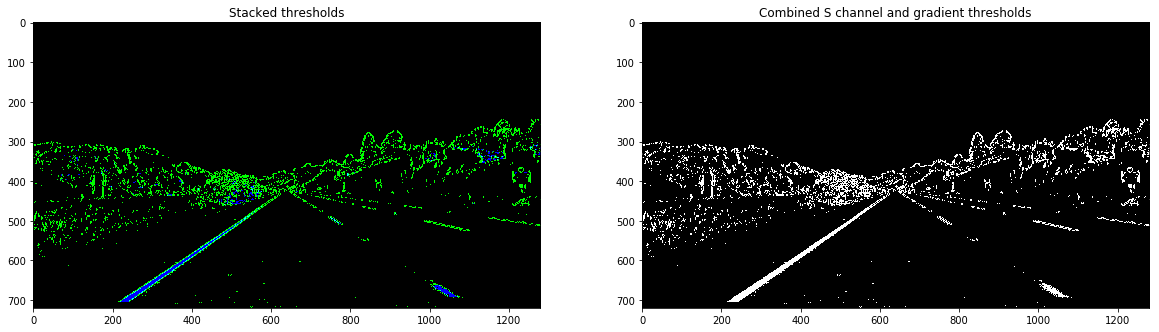

In [5]:
# Convert to HLS color space and separate the S channel
# Note: img is the undistorted image
img = cv2.imread("./output_images/undistortedTestImages/straight_lines1.jpg")
hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
s_channel = hls[:,:,2]

# Grayscale image
# NOTE: we already saw that standard grayscaling lost color information for the lane lines
# Explore gradients in other colors spaces / color channels to see what might work better
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Sobel x
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

# Threshold x gradient
thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

# Threshold color channel
s_thresh_min = 170
s_thresh_max = 255
s_binary = np.zeros_like(s_channel)
s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1

# Stack each channel to view their individual contributions in green and blue respectively
# This returns a stack of the two binary images, whose components you can see as different colors
color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255

# Combine the two binary thresholds
combined_binary = np.zeros_like(sxbinary)
combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1

# Plotting thresholded images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Stacked thresholds')
ax1.imshow(color_binary)

ax2.set_title('Combined S channel and gradient thresholds')
ax2.imshow(combined_binary, cmap='gray')


## Persective Transform on the Images

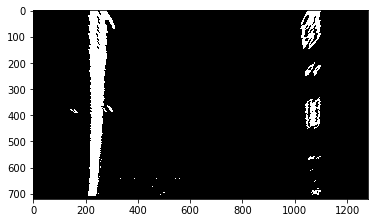

In [32]:
def perspectiveTransform(img, srcPoints, destPoints):
    M = cv2.getPerspectiveTransform(srcPoints, destPoints)
    h, w = img.shape[:2]
    return cv2.warpPerspective(img, M, (w,h))

#img = cv2.imread("./output_images/undistortedTestImages/test6.jpg")
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = combined_binary
h, w = img.shape[:2]
src = np.float32([[w, h-10],        # br
                      [0, h-10],    # bl
                      [546, 460],   # tl
                      [732, 460]])  # tr

offset = 10
dst = np.float32([[w-offset, h-offset],           # br
                      [offset, h-offset],       # bl
                      [offset, offset],       # tl
                      [w-offset, offset]])      # tr
warped = perspectiveTransform(img, src, dst)
plt.imshow(warped, cmap='gray')
plt.show()

## Detect Lane Pixels and and fit to find the lane boundary.

In [33]:
# Define method to fit polynomial to binary image with lines extracted, using sliding window
def sliding_window_polyfit(img):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(img[img.shape[0]//2:,:], axis=0)
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    quarter_point = np.int(midpoint//2)
    # Previously the left/right base was the max of the left/right half of the histogram
    # this changes it so that only a quarter of the histogram (directly to the left/right) is considered
    leftx_base = np.argmax(histogram[quarter_point:midpoint]) + quarter_point
    rightx_base = np.argmax(histogram[midpoint:(midpoint+quarter_point)]) + midpoint
    
    #print('base pts:', leftx_base, rightx_base)

    # Choose the number of sliding windows
    nwindows = 10
    # Set height of windows
    window_height = np.int(img.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 80
    # Set minimum number of pixels found to recenter window
    minpix = 40
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []
    # Rectangle data for visualization
    rectangle_data = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = img.shape[0] - (window+1)*window_height
        win_y_high = img.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        rectangle_data.append((win_y_low, win_y_high, win_xleft_low, win_xleft_high, win_xright_low, win_xright_high))
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    left_fit, right_fit = (None, None)
    # Fit a second order polynomial to each
    if len(leftx) != 0:
        left_fit = np.polyfit(lefty, leftx, 2)
    if len(rightx) != 0:
        right_fit = np.polyfit(righty, rightx, 2)
    
    visualization_data = (rectangle_data, histogram)
    
    return left_fit, right_fit, left_lane_inds, right_lane_inds, visualization_data
print('...')

...


...


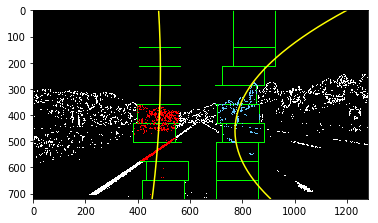

In [34]:
# visualize the result on example image
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
exampleImg = cv2.imread("./output_images/undistortedTestImages/test6.jpg")
exampleImg = cv2.cvtColor(exampleImg, cv2.COLOR_BGR2RGB)
#exampleImg_bin, Minv = pipeline(exampleImg)

exampleImg_bin = war
left_fit, right_fit, left_lane_inds, right_lane_inds, visualization_data = sliding_window_polyfit(exampleImg_bin)

h = exampleImg.shape[0]
left_fit_x_int = left_fit[0]*h**2 + left_fit[1]*h + left_fit[2]
right_fit_x_int = right_fit[0]*h**2 + right_fit[1]*h + right_fit[2]
#print('fit x-intercepts:', left_fit_x_int, right_fit_x_int)

rectangles = visualization_data[0]
histogram = visualization_data[1]

# Create an output image to draw on and  visualize the result
out_img = np.uint8(np.dstack((exampleImg_bin, exampleImg_bin, exampleImg_bin))*255)
# Generate x and y values for plotting
ploty = np.linspace(0, exampleImg_bin.shape[0]-1, exampleImg_bin.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
for rect in rectangles:
# Draw the windows on the visualization image
    cv2.rectangle(out_img,(rect[2],rect[0]),(rect[3],rect[1]),(0,255,0), 2) 
    cv2.rectangle(out_img,(rect[4],rect[0]),(rect[5],rect[1]),(0,255,0), 2) 
# Identify the x and y positions of all nonzero pixels in the image
nonzero = exampleImg_bin.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [100, 200, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

print('...')